# Stage A Test

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
url = 'https://raw.githubusercontent.com/WalePhenomenon/climate_change/master/fuel_ferc1.csv?raw=true'

In [3]:
fuel_data = pd.read_csv(url, error_bad_lines=False)

In [4]:
fuel_data

,record_id,utility_id_ferc1,report_year,plant_name_ferc1,fuel_type_code_pudl,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
0,f1_fuel_1994_12_1_0_7,1,1994,rockport,coal,ton,5377489.0,16.590,18.59,18.53,1.121
1,f1_fuel_1994_12_1_0_10,1,1994,rockport total plant,coal,ton,10486945.0,16.592,18.58,18.53,1.120
2,f1_fuel_1994_12_2_0_1,2,1994,gorgas,coal,ton,2978683.0,24.130,39.72,38.12,1.650
3,f1_fuel_1994_12_2_0_7,2,1994,barry,coal,ton,3739484.0,23.950,47.21,45.99,1.970
4,f1_fuel_1994_12_2_0_10,2,1994,chickasaw,gas,mcf,40533.0,1.000,2.77,2.77,2.570
...,...,...,...,...,...,...,...,...,...,...,...
29518,f1_fuel_2018_12_12_0_13,12,2018,neil simpson ct #1,gas,mcf,18799.0,1.059,4.78,4.78,9.030
29519,f1_fuel_2018_12_12_1_1,12,2018,cheyenne prairie 58%,gas,mcf,806730.0,1.050,3.65,3.65,6.950
29520,f1_fuel_2018_12_12_1_10,12,2018,lange ct facility,gas,mcf,104554.0,1.060,4.77,4.77,8.990
29521,f1_fuel_2018_12_12_1_13,12,2018,wygen 3 bhp 52%,coal,ton,315945.0,16.108,3.06,14.76,1.110


In [5]:
# Question 1
a = [1, 2, 3, 4, 5, 6]
b = [13, 21, 34]

In [6]:
a.extend(b)
a

[1, 2, 3, 4, 5, 6, 13, 21, 34]

In [7]:
# Question 2: A 3x3 Identity matrix
np.identity(3)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [8]:
# Question 3: Fuel type with the lowest average coal per unit burned
# Getting all data columns first
fuel_data.columns

Index(['record_id', 'utility_id_ferc1', 'report_year', 'plant_name_ferc1',
       'fuel_type_code_pudl', 'fuel_unit', 'fuel_qty_burned',
       'fuel_mmbtu_per_unit', 'fuel_cost_per_unit_burned',
       'fuel_cost_per_unit_delivered', 'fuel_cost_per_mmbtu'],
      dtype='object')

In [9]:
# Grouping by the fuel type first before checking their mean (average) fuel cost per unit burned
# We can see gas is the fuel type with the lowest cost per unit burned
fuel_data.groupby('fuel_type_code_pudl')['fuel_cost_per_unit_burned'].mean()

fuel_type_code_pudl
coal         67.421830
gas          13.659397
nuclear    4955.157002
oil         168.877086
other        18.253856
waste        19.518122
Name: fuel_cost_per_unit_burned, dtype: float64

In [10]:
# Question 4: Standard deviation and 75th percentile of the energy per unit (fuel_mmbtu_per_unit)
# From getting a full description of the model, the std is 10.60 and the 75th percentile is 17.01
fuel_data['fuel_mmbtu_per_unit'].describe()

count    29523.000000
mean         8.492111
std         10.600220
min          0.000001
25%          1.024000
50%          5.762694
75%         17.006000
max        341.260000
Name: fuel_mmbtu_per_unit, dtype: float64

In [11]:
# Question 5: Finding the skewness and kurtosis for the fuel quantity burned
import scipy.stats as stats

In [12]:
# To 2 decimal places, the skewness of the fuel quantity burned is 15.85 and the kurtosis is 651.37
print(
    'Unbiased Estimation of skewness: ' + str(stats.skew(fuel_data['fuel_qty_burned'], bias=False)), 
    'Biased Estimation of skewness: ' + str(pd.DataFrame(fuel_data['fuel_qty_burned']).skew()[0]),
    'Unbiased Estimation of kurtosis: ' + str(stats.kurtosis(fuel_data['fuel_qty_burned'], bias=False)), 
    'Biased Estimation of kurtosis: ' + str(pd.DataFrame(fuel_data['fuel_qty_burned']).kurtosis()[0]),
    sep='\n')

Unbiased Estimation of skewness: 15.8514954691095
Biased Estimation of skewness: 15.851495469109503
Unbiased Estimation of kurtosis: 651.3694501337731
Biased Estimation of kurtosis: 651.3694501337732


In [13]:
# Question 6: Feature with missing values is the fuel_unit feature with 180 missing values in total
fuel_data.isnull().sum()

record_id                         0
utility_id_ferc1                  0
report_year                       0
plant_name_ferc1                  0
fuel_type_code_pudl               0
fuel_unit                       180
fuel_qty_burned                   0
fuel_mmbtu_per_unit               0
fuel_cost_per_unit_burned         0
fuel_cost_per_unit_delivered      0
fuel_cost_per_mmbtu               0
dtype: int64

In [14]:
# Getting the shape of the whole dataset...
fuel_data.shape

(29523, 11)

In [15]:
# Calculating the percentage of missing rows to the total number of rows...
(180/fuel_data.shape[0]) * 100

0.609694136774718

In [16]:
# Question 7: The fuel_unit feature which has the missing values is a categorical feature because as seen below, all values
# under this feature is not in numerical format and the dataset is restricted to these labels
fuel_data['fuel_unit'].unique()

array(['ton', 'mcf', 'kgU', 'bbl', 'gramsU', nan, 'mwdth', 'mmbtu',
       'mwhth', 'gal'], dtype=object)

In [17]:
fuel_data['fuel_unit'] = fuel_data['fuel_unit'].fillna(value='mcf')
fuel_data.isnull().sum()

record_id                       0
utility_id_ferc1                0
report_year                     0
plant_name_ferc1                0
fuel_type_code_pudl             0
fuel_unit                       0
fuel_qty_burned                 0
fuel_mmbtu_per_unit             0
fuel_cost_per_unit_burned       0
fuel_cost_per_unit_delivered    0
fuel_cost_per_mmbtu             0
dtype: int64

In [18]:
# Question 8: Features with the second and third lowest correlation with the Fuel Cost per Unit burned
from scipy.stats import pearsonr # For finding Pearson Correlation Coefficient

In [19]:
numeric_features = ['utility_id_ferc1', 'report_year', 'fuel_qty_burned', 'fuel_mmbtu_per_unit', 'fuel_cost_per_unit_burned', 'fuel_cost_per_unit_delivered', 'fuel_cost_per_mmbtu' ] # Getting all numeric values in the dataset
corrs = [] # List to store correlation coefficients for all features

for feature in numeric_features:
    corr, _ = pearsonr(fuel_data['fuel_cost_per_unit_burned'], fuel_data[feature])
    corrs.append(corr)

In [20]:
corrs

[-0.03786270759997208,
 0.013599134438133896,
 -0.01853541679482522,
 -0.01003380842885301,
 1.0,
 0.011007403299165596,
 -0.00043721044397039934]

In [21]:
# The feature with the lowest correlation is the one with a correlation coefficient closest to zero. From the corrs list it can
# be seen that the feature with the second and third lowest correlation coefficient are fuel_mmbtu_per_unit and
# fuel_cost_per_unit_deivered
print('R for {}: {}'.format(numeric_features[3], corrs[3]), 
      'R for {}: {}'.format(numeric_features[5], corrs[5]),
      sep='\n')

R for fuel_mmbtu_per_unit: -0.01003380842885301
R for fuel_cost_per_unit_delivered: 0.011007403299165596


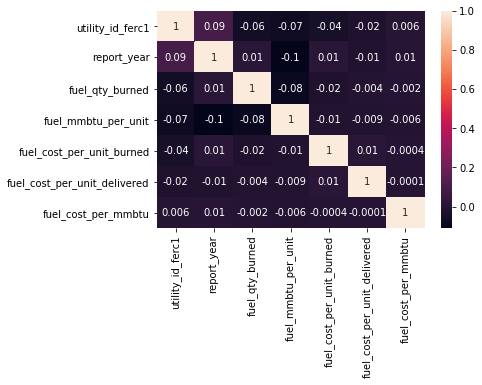

In [22]:
# An illustration of the correlation coefficients
sns.heatmap(fuel_data.corr(), annot = True, fmt='.1g')

In [23]:
# Question 9: Percentage change in fuel cost per unit burned in 1998 compared to 1994
coal_data = fuel_data[fuel_data['fuel_type_code_pudl'] == 'coal'] # Getting just observations for fuel_type "coal"
coal_data_for_1994 = coal_data[coal_data['report_year'] == 1994] # Getting coal_data for just 1994
sum_for_1994 = coal_data_for_1994['fuel_cost_per_unit_burned'].sum() 
sum_for_1994

14984.572000000002

In [24]:
coal_data_for_1998 = coal_data[coal_data['report_year'] == 1998] # Getting coal_data for just 1998
sum_for_1998 = coal_data_for_1998['fuel_cost_per_unit_burned'].sum() 
sum_for_1998

11902.597

In [25]:
# The percentage change from 1998 to 1994 shows a drop of approximately 21%
((sum_for_1998/sum_for_1994) * 100) - 100

-20.567654518260525

In [26]:
# Question 10: Year with highest average fuel cost per unit delivered
grouped_year_data = fuel_data.groupby('report_year')['fuel_cost_per_unit_delivered'].mean()
grouped_year_data

report_year
1994       63.636060
1995       32.735269
1996     9196.705948
1997    11140.197239
1998      287.154420
1999       25.551627
2000      985.362877
2001       60.050396
2002       47.594361
2003       55.663493
2004      139.524275
2005       41.438184
2006       38.657484
2007       43.325023
2008       58.588197
2009      652.694163
2010       91.862105
2011       59.774667
2012       60.994502
2013      172.307591
2014      192.737183
2015      326.535511
2016      103.901761
2017       46.196861
2018      499.269966
Name: fuel_cost_per_unit_delivered, dtype: float64

In [27]:
# The highest average fuel cost per unit delivered is that of 1997
grouped_year_data.max()

11140.19723948813